In [12]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [24]:
data=pd.read_csv('banking.csv',header=0)
data=data.dropna() #xóa dữ liệu rỗng
data.shape #kích thước mảng

(41188, 21)

In [25]:
data.columns #các cột
#age:tuổi
#job:loại công viêc (“admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
#marital:tình trạng hôn nhân(“divorced”, “married”, “single”, “unknown”)
#education:giáo dục (“basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
#default:có tín dụng trong tình trạng vỡ nợ?(“no”, “yes”, “unknown”)
#housing:có cho vay mua nhà không(“no”, “yes”, “unknown”)
#loan:có vay cá nhân không(“no”, “yes”, “unknown”)
#contact:loại liên lạc liên hệ (“cellular”, “telephone”)
#month:Tháng liên hệ cuối cùng trong năm(“jan”, “feb”, “mar”,…, “nov”, “dec”)
#day_of_week:Ngày liên hệ cuối trong tuần(“mon”, “tue”, “wed”, “thu”, “fri”)
#duration: thời lượng liên hệ cuối cúng tính bằng s 
#campaign:số liên hệ trong chiến dịch này
#pdays:số ngày trôi qua sau khi khách hàng được liên hệ lần cuối từ một chiến dịch trước đó 999 là chưa được liên hệ trước đó
#previous:Số liên hệ thực hiện trước chiến dịch cho 1 khách hàng(số)
#poutcome:kết quả tiếp thị trước đó(“failure”, “nonexistent”, “success”)
#emp.var.rate:Tỉ lệ thay đổi việc làm (số)
#cons_conf_idx:Chỉ số giá tiêu dùng(số)
#cons.conf.idx:Chỉ số niềm tin của người tiêu dùng(số)
#euribor3m:Lãi suất 3 tháng (số )
#nr.employed: Số lượng nhân viên (số)
#y - khách hàng đã đăng ký tiền gửi có kỳ hạn chưa? (nhị phân: “1”, nghĩa là “Có”, “0” nghĩa là “Không”)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [26]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [27]:
data['education'].unique() #các mục của cột education

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [50]:
#Trong cột education có 3 cột basic.4y,basic.6y và basic.9y gộp lại thành basic
data['education']=np.where(data ['education'] =='basic.4y','Basic',data['education']) 
data['education']=np.where(data ['education'] =='basic.9y','Basic',data['education']) 
data['education']=np.where(data ['education'] =='basic.6y','Basic',data['education'])

In [51]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [56]:
data['y'].unique()

array([0, 1])

In [55]:
data['y'].value_counts() #số lượng dữ liệu các mục

0    36548
1     4640
Name: y, dtype: int64

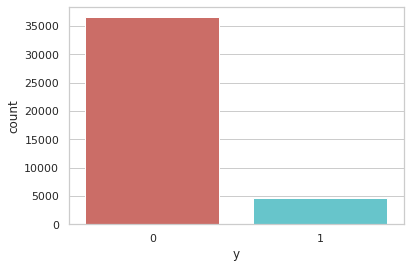

In [57]:
q=sns.countplot(x='y',data=data,palette='hls')
q

In [58]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub) #Tính phần trăm no_sub
print("percentage of no subscription is", pct_of_no_sub*100) 
pct_of_sub = count_sub/(count_no_sub+count_sub) #Tính phần trăm sub
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [60]:
data.groupby('y').mean() #1 là có,0 là không, nhóm cột y giá trị trung bình

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [61]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [62]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [63]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


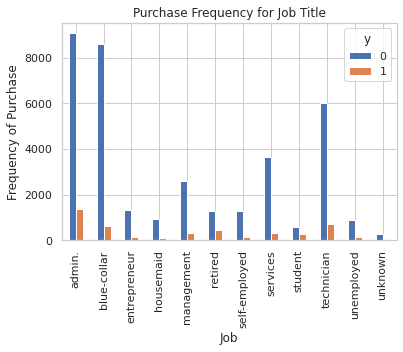

In [64]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar') #Bảng tần số của job và y
plt.title('Purchase Frequency for Job Title') #tiêu đề
plt.xlabel('Job') #têm cột x
plt.ylabel('Frequency of Purchase') #tên cột y
plt.savefig('purchase_fre_job')

Tần suất Y phụ thuộc rất nhiều vào job, do đó job là một yếu tố dự đoán toán về biến kết quả

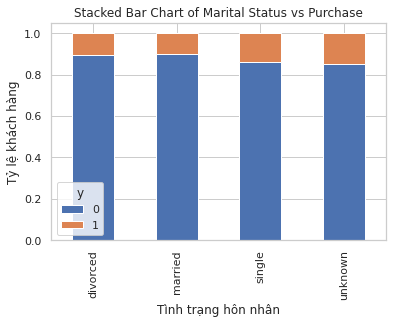

In [67]:
#y là khách hàng đã đăng ký tiền gửi là kì hạn chưa 1 là có, 0 là không 
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Tình trạng hôn nhân')
plt.ylabel('Tỷ lệ khách hàng')
plt.savefig('mariral_vs_pur_stack')

marital (Tình trạng hôn nhân) không phải là yếu tố dự báo chính xác cho biến kết quả 

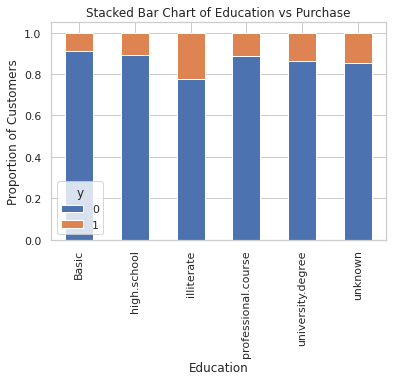

In [68]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

In [ ]:
Education(Giáo dục) dường như là một yếu tố dự báo tốt cho biến kết quả 

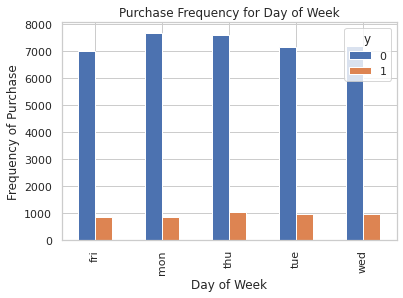

In [69]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

day_of_week(Ngày liên hệ cuối cùng trong tuần) không phải là một dự đoán tốn về biến kết quả

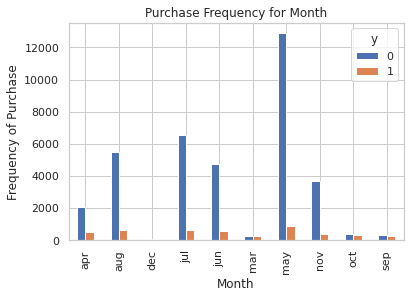

In [70]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

moon(Tháng liên hệ cuối cùng trong năm) là một dự đoán tốt về biến kết quả 

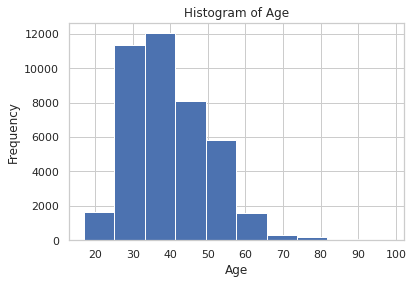

In [71]:
data.age.hist() #Biểu đồ hist (biểu đồ tần suất) của cột age
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Hầu hết khách hàng ở độ tuổi 30-40

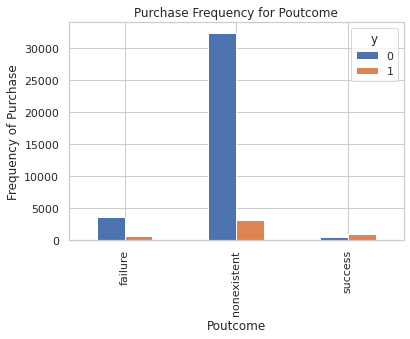

In [72]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [ ]:
Poutcome (kết quả tiếp thị của chiến dịch trước đó ) dường như là một dự đoán tốt về biến kết quả

In [73]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [74]:
 #tên cột_ các mục của cột
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',